<a href="https://colab.research.google.com/github/stevengregori92/Learn-XGBoost/blob/main/Blood_Donors_with_PCA_and_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install luwiji

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

#Import Dataset

In [3]:
!gdown https://drive.google.com/uc?id=1QZ1VcEpiBgFg5BHUh5_phsEpYwj8aUYW

Downloading...
From: https://drive.google.com/uc?id=1QZ1VcEpiBgFg5BHUh5_phsEpYwj8aUYW
To: /content/hepatitisC.zip
100% 15.1k/15.1k [00:00<00:00, 34.7MB/s]


In [4]:
!unzip /content/hepatitisC.zip

Archive:  /content/hepatitisC.zip
replace HepatitisCdata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
df = pd.read_csv('HepatitisCdata.csv', index_col='Unnamed: 0')
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [6]:
df.Category.value_counts()

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

#Cleaning Dataset

,missing_value,%
Category,0,0.00
Age,0,0.00
Sex,0,0.00
ALB,1,0.16
ALP,18,2.93
ALT,1,0.16
AST,0,0.00
BIL,0,0.00
CHE,0,0.00
CHOL,10,1.63


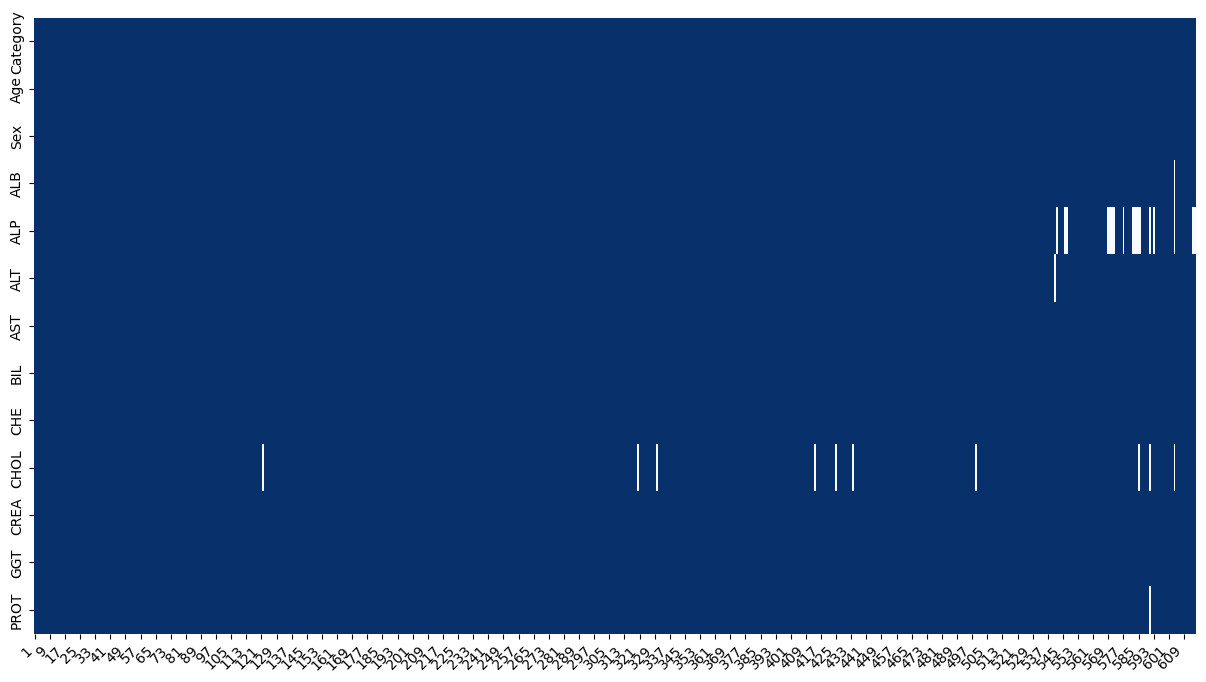

In [7]:
plot_missing_value(df, return_df=True)

In [8]:
df = df.fillna(df.mean())

<ipython-input-8-04e87d67d337>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [9]:
df = df.query("Category != '0s=suspect Blood Donor'")

In [10]:
df.Category.value_counts()

0=Blood Donor    533
3=Cirrhosis       30
1=Hepatitis       24
2=Fibrosis        21
Name: Category, dtype: int64

In [11]:
df.loc[:, 'Category'] = df['Category'].replace(['0=Blood Donor', '3=Cirrhosis', '1=Hepatitis', '2=Fibrosis'], [0,1,2,3])

<ipython-input-11-208a5eb67a81>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Category'] = df['Category'].replace(['0=Blood Donor', '3=Cirrhosis', '1=Hepatitis', '2=Fibrosis'], [0,1,2,3])


In [12]:
df['Sex'] = df['Sex'].replace(['f', 'm'], [0,1])

#Dataset Splitting

In [13]:
X = df.drop(columns=['Category'])
y = df.Category

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((486, 12), (122, 12), (486,), (122,))

#SMOTE

In [14]:
from imblearn.over_sampling import SMOTE

In [26]:
sm = SMOTE(random_state=42,sampling_strategy={0:533, 1:533, 2:533, 3:533})
X_train, y_train = sm.fit_resample(X, y)

#PCA

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA().fit(X_train)

Text(0, 0.5, 'Cumulative Explained Variance')

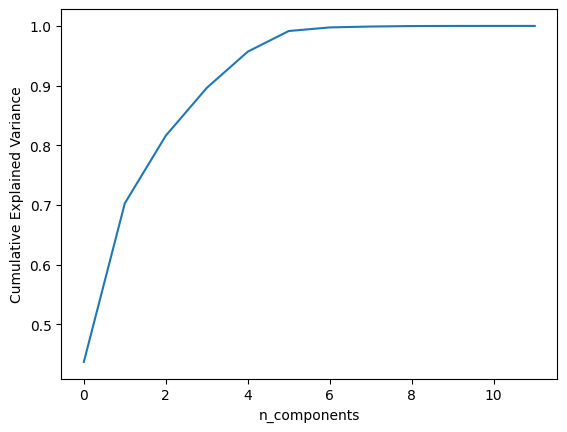

In [29]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('n_components')
plt.ylabel('Cumulative Explained Variance')

#Training

In [30]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [31]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), X_train.columns)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('pca', PCA(n_components=8, whiten=True)),
    ('algo', XGBClassifier(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter = 50, n_jobs=-1, verbose=1, random_state = 42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.7419203085006956, 'algo__gamma': 1, 'algo__learning_rate': 0.27762530094438326, 'algo__max_depth': 7, 'algo__n_estimators': 113, 'algo__reg_alpha': 0.09444574254983565, 'algo__reg_lambda': 0.12329098365270522, 'algo__subsample': 0.5137705091792748}
0.9995309568480301 0.9671718072145956 0.9918032786885246


,feature,importance,stdev
5,AST,0.270826,0.004466
3,ALP,0.229644,0.002384
10,GGT,0.220450,0.006029
4,ALT,0.173734,0.007099
0,Age,0.152627,0.004620
6,BIL,0.107129,0.002885
9,CREA,0.084053,0.003815
11,PROT,0.016886,0.000984
2,ALB,0.013696,0.000460
7,CHE,0.001407,0.000785


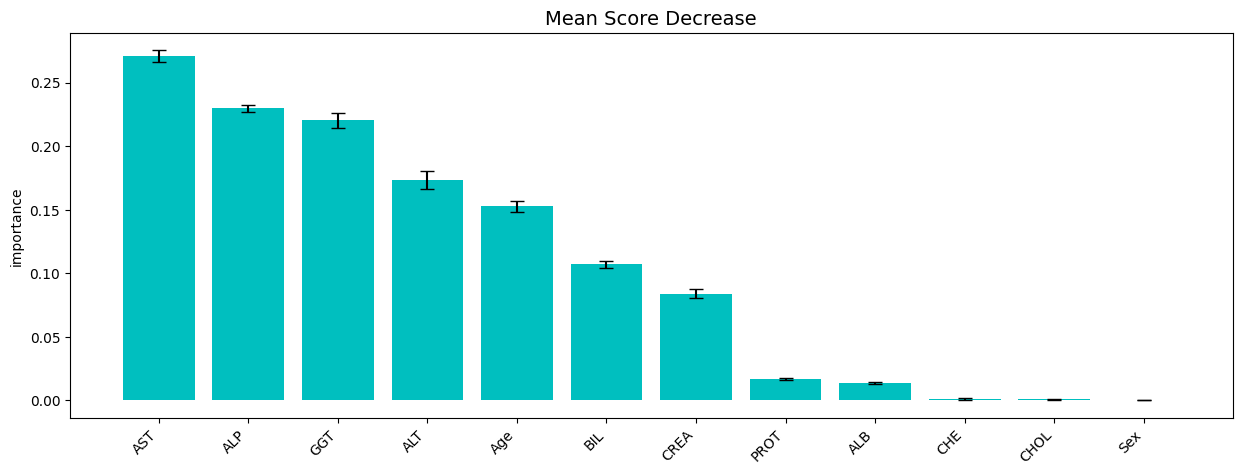

In [32]:
mean_score_decrease(X_train, y_train, model, plot=True, topk=50)

#Confusion Matrix

In [33]:
from jcopml.plot import plot_confusion_matrix

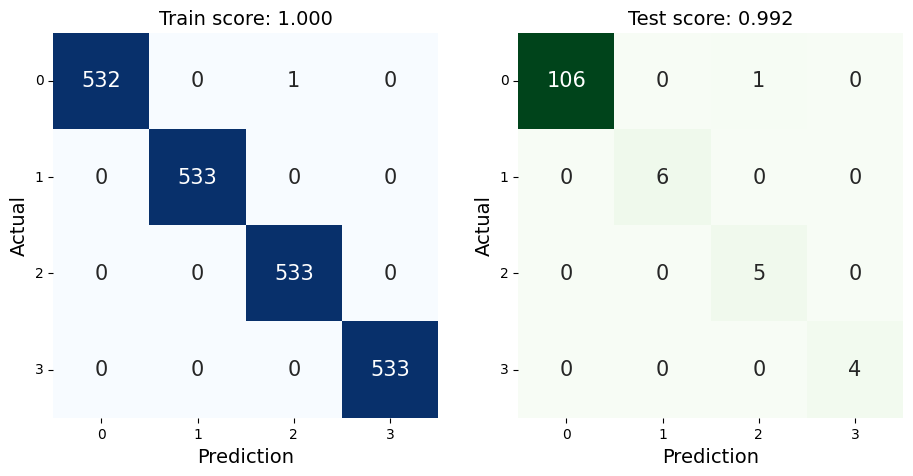

In [34]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

In [24]:
from jcopml.plot import plot_classification_report

In [25]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report= True)

Train report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       533
           1       1.00      1.00      1.00       533
           2       1.00      1.00      1.00       533
           3       1.00      1.00      1.00       533

    accuracy                           1.00      2132
   macro avg       1.00      1.00      1.00      2132
weighted avg       1.00      1.00      1.00      2132


Test report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       107
           1       1.00      1.00      1.00         6
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         4

    accuracy                           0.99       122
   macro avg       0.96      1.00      0.98       122
weighted avg       0.99      0.99      0.99       122

